In [ ]:
import os
import tensorflow as tf

import cProfile

tf.executing_eagerly()

True

In [ ]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[..., tf.newaxis]/255, tf.float32),
     tf.cast(mnist_labels, tf.int64)
     ))

dataset = dataset.shuffle(1000).batch(32)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist_model = tf.keras.Sequential([
                                   tf.keras.layers.Conv2D(16, [3,3], activation='relu',
                                                          input_shape=(None, None, 1)),
                                   tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
                                   tf.keras.layers.GlobalAveragePooling2D(),
                                   tf.keras.layers.Dense(10)
])

In [ ]:
mnist_model.summary()

# Logit: Values used as input to softmax


for images, labels in dataset.take(1):
  print("Logits: ", mnist_model(images[0:1]).numpy())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 16)    160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
_________________________________________________________________
Logits:  [[ 0.00121988 -0.04408433  0.02608965 -0.02081358 -0.03080192  0.02321623
   0.05760741  0.00467529  0.0275059  -0.04941407]]


In [ ]:
# Keras models have builtin training loop ('fit' method)
# More customization

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

def train_step(images, labels):
  # Use to inspect computes gradients
  with tf.GradientTape() as tape:
      logits = mnist_model(images, training=True)

      tf.debugging.assert_equal(logits.shape, (32,10))

      loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))


def train(epochs):
  for epoch in range(epochs):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)

    print('Epoch {} finished'.format(epoch))

train(epochs=3)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


Text(0, 0.5, 'Loss [Entropy]')

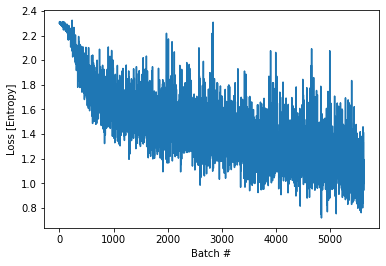

In [ ]:
import matplotlib.pyplot as plt


plt.plot(loss_history)
plt.xlabel("Batch #")
plt.ylabel("Loss [Entropy]")

In [ ]:
# Short

x = tf.ones((2,2))

with tf.GradientTape(persistent=True) as t:
  t.watch(x)

  y = tf.reduce_sum(x)
  z = tf.multiply(y,y)


dz_dx = t.gradient(z,x)
dz_dy = t.gradient(z,y)
print(dz_dy)
print(dz_dx)


del t

tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [ ]:
####################
# START HERE
import os
import tensorflow as tf
import cProfile

tf.executing_eagerly()

x = [[2.]]
m = tf.matmul(x,x)
print(m)

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


In [ ]:
x = [[2., 3.]]
y = [[1.], [4.]]

a = tf.constant([[1,2], [3,4]])

print(tf.matmul(x,y))
print(a)

b = tf.add(a,1)
print(b)

c = a + 1
print(c)

# Overloading
print(a*b)

# Obtain numpy value from tensor
print(a.numpy())

def fizzbuzz(max_num):
  counter = tf.constant(0)
  max_num = tf.convert_to_tensor(max_num)

  for num in range(1, max_num.numpy() + 1):
    num = tf.constant(num)
    if int(num % 3) == 0 and int (num % 5) == 0:
      print('FizzBuzz')
    elif int(num % 3) == 0:
      print('Fizz')
    elif int(num % 5) == 0:
      print('Buzz')
    else:
      print(num.numpy())
    counter += 1

fizzbuzz(15)

tf.Tensor([[14.]], shape=(1, 1), dtype=float32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)
[[1 2]
 [3 4]]
1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


In [ ]:
w = tf.Variable([[1.]])
print(w)

with tf.GradientTape() as tape:
  loss = w*w

grad = tape.gradient(loss, w)
print(grad)

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>
tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [ ]:
# Train model
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    
  (tf.cast(mnist_images[...,tf.newaxis] / 255, tf.float32),
   tf.cast(mnist_labels, tf.int64)
   ))

dataset = dataset.shuffle(1000).batch(32)



11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist_model = tf.keras.Sequential([
                                   
  tf.keras.layers.Conv2D(16, [3,3], activation='relu', input_shape=(None, None,1)),
  tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

for images,labels in dataset.take(1):
  print(mnist_model(images[0:1]).numpy())

[[-0.04099802 -0.00272278 -0.03153814 -0.00655243  0.00691699  0.00079763
   0.01094932  0.02273444  0.03199681  0.05127069]]


In [3]:
#################################
# Diven into Deep Learning
#################################

!pip install d2l

     |████████████████████████████████| 83 kB 1.3 MB/s 


In [16]:
#################################
# Diven into Deep Learning
#################################


######
# Ch 2
######

x = tf.range(12)
x

print(x.shape)
print(tf.size(x))

# -1 --> Automatically calculates dimnension
x = tf.reshape(x, (3,-1))
print(x)

print(tf.zeros((2,3,4)))
print(tf.ones((2,3,4)))


# Each element is randomly sampled from standard Gaussian (mean 0; stddev 1)
print(tf.random.normal(shape=[3,4]))


# Elementwise operations
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])

print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x**y)

(12,)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]], shape=(3, 4), dtype=int32)
tf.Tensor(
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]], shape=(2, 3, 4), dtype=float32)
tf.Tensor(
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]], shape=(2, 3, 4), dtype=float32)
tf.Tensor(
[[ 0.7257188   0.10995621  1.7581837   0.7951681 ]
 [-1.1187122  -0.31241304  0.25750652 -0.68812513]
 [-1.1525211  -0.3142537  -1.7743869   0.8678267 ]], shape=(3, 4), dtype=float32)
tf.Tensor([ 3.  4.  6. 10.], shape=(4,), dtype=float32)
tf.Tensor([-1.  0.  2.  6.], shape=(4,), dtype=float32)
tf.Tensor([ 2.  4.  8. 16.], shape=(4,), dtype=float32)
tf.Tensor([0.5 1.  2.  4. ], shape=(4,), dtype=float32)
tf.Tensor([ 1.  4. 16. 64.], shape=(4,), dtype=float32)


In [22]:
# Concat tensors

X = tf.reshape(tf.range(12, dtype=tf.float32), (3,4))
Y = tf.constant([[2,1,4,3], [1,2,3,4], [4,3,2,1]], dtype=tf.float32)

C1 = tf.concat([X,Y], axis=0)
print(X)
print(Y)
print(C1)

# Logical elementwise operation
print(X == Y)

# Sum all elements up
print(tf.reduce_sum(X))

tf.Tensor(
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[2. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 3. 2. 1.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [ 2.  1.  4.  3.]
 [ 1.  2.  3.  4.]
 [ 4.  3.  2.  1.]], shape=(6, 4), dtype=float32)
tf.Tensor(
[[False  True False  True]
 [False False False False]
 [False False False False]], shape=(3, 4), dtype=bool)
tf.Tensor(66.0, shape=(), dtype=float32)


In [24]:
# Apply elementwise operation on tensors of different size
a = tf.reshape(tf.range(3), (3,1))
b = tf.reshape(tf.range(2), (1,2))

print(a)
print(b)
print(a+b)

tf.Tensor(
[[0]
 [1]
 [2]], shape=(3, 1), dtype=int32)
tf.Tensor([[0 1]], shape=(1, 2), dtype=int32)
tf.Tensor(
[[0 1]
 [1 2]
 [2 3]], shape=(3, 2), dtype=int32)
